# Fashion MNIST: Modify MNIST 2 Hidden Layer Implementation

## Get the Fashion MNIST dataset

There are several options for downloading the dataset. Some have the data stored as value of intensity (integer values between 0 and 255) and others have the data stored already preprocessed as float decimals (decimal values between 0 and 1).

1) The Kaggle github page has instructions to download the zip file:

    https://github.com/Kaggle/kaggle-api

2) The Zalando Research github page has instructions to load the dataset, as well as links to other libraries that allow you to download the dataset:

    https://github.com/zalandoresearch/fashion-mnist

3) The TensorFlow library has an option to download the dataset and use with the Keras framework:

    https://www.tensorflow.org/api_docs/python/tf/keras/datasets/fashion_mnist

4) There are many other options as well.

### My Choice
I decided to use the instructions from the Zalando Research github page, because it gives instructions to 'drop in' the Fashion-MNIST dataset where the MNIST dataset would normally have been used.

The below code assumes that the 4 .gz files have been downloaded to a folder placed in the same directory as this IPYNB file called "fashion_mnist_data".

### Note on the code
Per the assignment instructions, I have adopted and modified the code from the "MNIST - MLP BP Network with 2 Hidden Layers" IPYNB file.
For the printing of image, I referenced an example that I had read on a previous occassion on tensorflow.org:

    https://www.tensorflow.org/tutorials/keras/basic_classification

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.examples.tutorials.mnist import input_data
fashionmnist = input_data.read_data_sets("fashion_mnist_data/", one_hot=True)

C:\Users\camer\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting fashion_mnist_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting fashion_mnist_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting fashion_mnist_data/t10k-images-idx3-ubyte.gz
Extracting fashion_mnist_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


## Set the model, network and graph parameters

In [2]:
# Increasing the cycles didn't bring more accuracy in the few testing runs that I performed

rate = 0.001
cycles = 20
batchsize = 50

# Increased the parameters for the first and second layers, but I didn't see more accuracy using these increase parameters

neuronslayer1 = 512   ## originally 256
neuronslayer2 = 512   ## originally 256
neuronslayer3 = 256
numexpl = fashionmnist.train.num_examples

# The diminsions of the image data and labels stayed the same

x = tf.placeholder("float", [None, 784])
y = tf.placeholder("float", [None, 10])

## Define the model Weight and Bias parameters

In [3]:
w = {
    'layer1': tf.Variable(tf.random_normal([784, neuronslayer1])),
    'layer2': tf.Variable(tf.random_normal([neuronslayer1, neuronslayer2])),
    'layer3': tf.Variable(tf.random_normal([neuronslayer2, neuronslayer3])),
    'layerop': tf.Variable(tf.random_normal([neuronslayer3, 10]))
}

b = {
    'layer1': tf.Variable(tf.random_normal([neuronslayer1])),
    'layer2': tf.Variable(tf.random_normal([neuronslayer2])),
    'layer3': tf.Variable(tf.random_normal([neuronslayer3])),
    'layerop': tf.Variable(tf.random_normal([10]))
}

## Model Implementation

In [4]:
def mlp_bp(x, w, b):
    oplayer1 = tf.nn.relu(tf.add(tf.matmul(x, w['layer1']), b['layer1']))
    oplayer2 = tf.nn.relu(tf.add(tf.matmul(oplayer1, w['layer2']), b['layer2']))
    oplayer3 = tf.nn.relu(tf.add(tf.matmul(oplayer2, w['layer3']), b['layer3']))
    output  = tf.matmul(oplayer3, w['layerop']) + b['layerop']
    return output

predictions = mlp_bp(x, w, b)

## Cost and Optimization Functions

In [5]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=predictions, labels=y))
optimizer = tf.train.AdamOptimizer(learning_rate = rate).minimize(cost)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See @{tf.nn.softmax_cross_entropy_with_logits_v2}.



## TensorFlow Session

### Can it run faster?
Yes, but only a little bit. I added 'config.gpu_options' and it did hand off some of the computations [e.g. numpy.matmul()]. I did not record actual run times, but while watching Windows Task Manager I can see the % used of the CPU and GPU. If the MLP model were to become more computationally intensive, the GPU device would be utilized more to parallelize the computations.

In [6]:
initialcondition = tf.global_variables_initializer()

## If using GPUs
#config = tf.ConfigProto()
#config.gpu_options.allow_growth = True
#session = tf.InteractiveSession(config=config)

## If not using GPUs
session = tf.InteractiveSession()

session.run(initialcondition)
numbatches = int(numexpl/batchsize)
avgcost = [0.0] * cycles
for cycle in range(cycles):
    cyclecost = 0.0
    print("Running Cycle:", cycle, end = "") 
    for i in range(numbatches):
        xbatch, ybatch = fashionmnist.train.next_batch(batchsize)
        _, batchcost = session.run([optimizer, cost], feed_dict={x: xbatch, y: ybatch})
        cyclecost += batchcost 
    avgcost[cycle] = cyclecost / numbatches
    print(". Completed. Cost:", avgcost[cycle])

Running Cycle: 0. Completed. Cost: 2178.9910251825504
Running Cycle: 1. Completed. Cost: 770.4214537325772
Running Cycle: 2. Completed. Cost: 502.05017571221697
Running Cycle: 3. Completed. Cost: 382.5124764260379
Running Cycle: 4. Completed. Cost: 287.84329257791694
Running Cycle: 5. Completed. Cost: 230.71860830783845
Running Cycle: 6. Completed. Cost: 183.97202145511454
Running Cycle: 7. Completed. Cost: 146.84810638080944
Running Cycle: 8. Completed. Cost: 121.64554979562759
Running Cycle: 9. Completed. Cost: 105.4788029774503
Running Cycle: 10. Completed. Cost: 89.69163349666378
Running Cycle: 11. Completed. Cost: 79.30421536245129
Running Cycle: 12. Completed. Cost: 68.41448300077157
Running Cycle: 13. Completed. Cost: 59.98313681492751
Running Cycle: 14. Completed. Cost: 53.75692299192466
Running Cycle: 15. Completed. Cost: 47.44915344658223
Running Cycle: 16. Completed. Cost: 45.6661664028906
Running Cycle: 17. Completed. Cost: 41.85220417051673
Running Cycle: 18. Completed. Co

## Plot the cost over the cycles

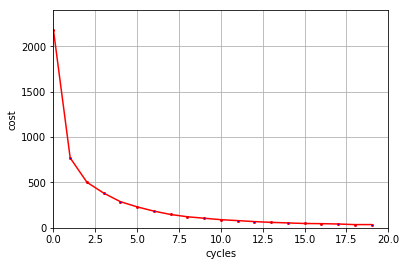

In [7]:
plt.axis([0,cycles,0,max(avgcost)*1.1])
plt.xlabel('cycles')
plt.ylabel('cost')
plt.grid()
plt.plot(avgcost, color='red', linestyle='solid', marker='o', markerfacecolor='blue', markersize=2)

## Evaluate the performance of the model

In [9]:
percentaccuracy = 100 * tf.reduce_mean(
                            tf.cast(tf.equal(tf.argmax(predictions, 1), 
                            tf.argmax(y, 1)), "float")).eval(
                            {x: fashionmnist.test.images, y: fashionmnist.test.labels})

print("Percent Accuracy: {:.2f}%".format(percentaccuracy))

Percent Accuracy: 84.89%


In [10]:
# Close the session after training and checking the accuracy with the testing data
session.close()

### Best result acheived in testing

I ran the data through several times, and recorded the best result from testing:

#### All layers use Relu - Selected version for this IPYNB

    Percent Accuracy: 84.89%

#### First layer Softmax, Second and third layers Relu

    Percent Accuracy: 69.15%

#### Other activation functions to try in the future

    https://www.tensorflow.org/api_docs/python/tf/nn
    
#### Other things to test

    1) Add more dense layers
    2) Add some convulutional layers (CNN)

## Print a random entry from the Training set

Per assignment instructions, the code below selects a random entry and prints the image by ploting the 'intensities' of data.

Text(0.5,0.98,'T-shirt/top')

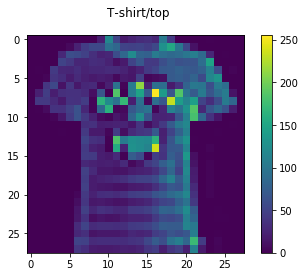

In [11]:
# Get a new batch of the training data
xbatch, ybatch = fashionmnist.train.next_batch(batchsize)

# Set the Label classes for printing a Label on the image
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Get the random integer to pull the random training image and label
random_int = np.random.randint(0,batchsize)
random_train_image = np.floor(xbatch[random_int]*255).reshape((28, 28))
random_train_label = class_names[np.argmax(ybatch[random_int])]

# Plot the reshaped image array with the label
plt.figure()
plt.imshow(random_train_image)
plt.colorbar()
plt.grid(False)
plt.suptitle(random_train_label)